## Đào Đức Minh - 21010555
---

### Vấn đề bài toán

1. Chỉ ra hàm mục tiêu và ràng buộc, phân tích lồi. 
2. Ví dụ minh hoạ (bao gồm code)

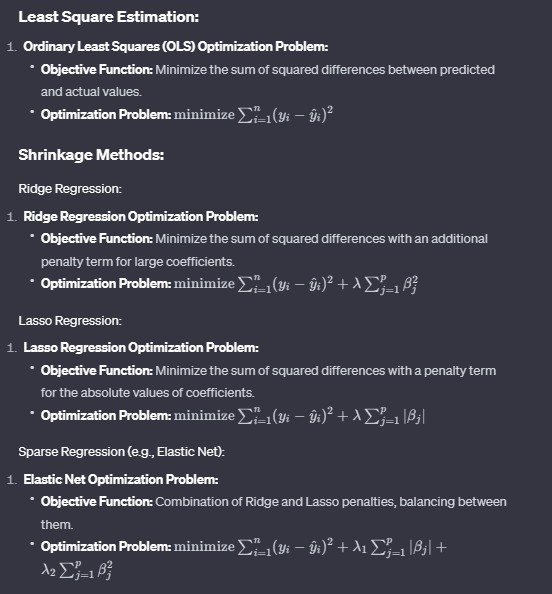
***

### Giới thiệu chung

Mục tiêu của bài toán là giúp chúng ta hiểu về mô hình hồi qui Lasso. Giả định bạn đang xây dựng mô hình hồi qui tuyến tính nhưng thật không may mắn, mô hình của bạn gặp hiện tượng quá khớp (overfitting). Khi đó bạn có thể nghĩ đến một số ý tưởng:

- Giảm bớt số lượng biến đầu vào.

- Loại bỏ outliers.

- Xử lý các trường hợp dữ liệu bị khuyết.

- Thu thập thêm dữ liệu huấn luyện.

- Thay đổi lớp mô hình.

…

Có khá nhiều ý tưởng cho bạn thử nghiệm, một trong số chúng có thể giúp bạn khắc phục hiện tượng quá khớp. Đa phần các kĩ thuật đều liệu quan tới xử lý dữ liệu đầu vào một cách thủ công và cần phải cân nhắc trước khi đưa ra một quyết định thay đổi dữ liệu đầu vào.

Nhưng có một phương pháp khá hiệu quả giúp khắc phục tức thời hiện tượng quá khớp mà không đòi hỏi chúng ta phải thay đổi dữ liệu. Đó chính là hồi qui Ridge và Lasso mà chúng ta sẽ tìm hiểu trong bài viết này.

Vậy thì Ridge và Lasso là những mô hình như thế nào? Vì sao chúng lại khắc phục được hiện tượng quá khớp?

Một cách khách quan, Ridge và Lasso là những biến thể của hồi qui tuyến tính mà ở đó chúng ta thay đổi hàm mất mát MSE để kiểm soát độ lớn của tham số huấn luyện nhằm giảm thiểu hiện tượng quá khớp trong các bài toán dự báo của học có giám sát.

### Tính tổng quát của mô hình

Một mục tiêu tiên quyết để có thể áp dụng được mô hình vào thực tiến đó là chúng ta cần giảm thiểu hiện tượng quá khớp. Để thực hiện được mục tiêu đó, mô hình được huấn luyện được kì vọng sẽ nắm bắt được qui luật tổng quát từ tập huấn luyện (train dataset) mà qui luật đó phải đúng trên những dữ liệu mới mà nó chưa được học. Thông thường tập dữ liệu mới đó được gọi là tập kiểm tra (test dataset). Đây là một tập dữ liệu độc lập được sử dụng để đánh giá mô hình. Do đó, ta có hàm mục tiêu của Lasso Regression là: 

$$\frac{1}{2n} \sum_{i=1}^{n}(y_i - \sum_{j=1}^{p}x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^{p}|\beta_j|$$ 

Trong đó: 

- $n$ là số lượng quan sát. 

- $p$ là số lượng biến độc lập. 

- $y_i$ là biến phụ thuộc thứ $i$. 

- $x_{ij}$ là giá trị của biến độc lập thứ $j$ cho quan sát thứ $i$. 

- $\beta_j$ là ước lượng tham số cho biến độc lập thứ $j$. 

- $\lambda$ là hệ số điều chỉnh. 

Ràng buộc của Lasso Regression là tổng giá trị tuyệt đối của các ước lượng tham số không vượt quá một giá trị điều chỉnh $\lambda$

### Hồi qui LASSO

Trong hồi qui Lasso, thay vì sử dụng thành phần điều chuẩn là norm chuẩn bậc hai thì chúng ta sử dụng norm chuẩn bậc 1.

$$\mathcal{L}(\mathbf{w})=\frac{1}{N}\|\overline{\mathbf{X}} \mathbf{w}-\mathbf{y}\|_2^2+\underbrace{\alpha\|\mathbf{w}\|_1}_{\text {regularization term }}$$

Khi tiến hành hồi qui mô hình Lasso trên một bộ dữ liệu mà có các biến đầu vào đa cộng tuyến (multicollinear) thì mô hình hồi qui Lasso sẽ có xu hướng lựa chọn ra một biến trong nhóm các biến đa cộng tuyến và bỏ qua những biến còn lại. Trong khi ở mô hình hồi qui tuyến tính thông thường và hồi qui Ridge thì có xu hướng sử dụng tất cả các biến đầu vào.

Bài toán tối ưu đối với hàm hồi qui Lasso tương đương với bài toán tối ưu với điều kiện ràng buộc về độ lớn của hàm mục tiêu:

$$\begin{aligned} \mathcal{L}(\mathbf{w}) & =\frac{1}{N}\|\overline{\mathbf{X}} \mathbf{w}-\mathbf{y}\|_2^2+\alpha\|\mathbf{w}\|_{1} \\ \text { subject } & :\|\mathbf{w}\|_1<C, C>0\end{aligned}$$
 
Thành phần điều chuẩn norm bậc 1 cũng có tác dụng như một sự kiểm soát áp đặt lên hệ số ước lượng. Khi muốn gia tăng sự kiểm soát, chúng ta sẽ gia tăng hệ số để mô hình trở nên bớt phức tạp hơn. Cũng tương tự như hồi qui Ridge chúng ta cùng phân tích tác động của $\alpha$:

Trường hợp $\alpha = 0$, thành phần điều chuẩn bị tiêu giảm và chúng ta quay trở về bài toán hồi qui tuyến tính.

Trường hợp $\alpha$ nhỏ thì vai trò của thành phần điều chuẩn trở nên ít quan trọng. Mức độ kiểm soát quá khớp của mô hình sẽ trở nên kém hơn.

Trường hợp $\alpha$ lớn chúng ta muốn gia tăng mức độ kiểm soát lên độ lớn của các hệ số ước lượng.

### Huấn luyện mô hình

In [18]:
# import thư viện
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_regression
from sklearn.linear_model import LassoCV
import nbconvert

In [2]:
# tạo dữ liệu giả
np.random.seed(233)
n_samples, n_features = 200, 2
X = np.random.randn(n_samples, n_features)
# tạo ma trận thưa
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # chỉ giữ 10 hệ số đầu tiên
y = np.dot(X, coef)
# thêm nhiễu vào dữ liệu
y += 0.01 * np.random.normal(size=n_samples)

In [10]:
# chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

c:\Users\Mink\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


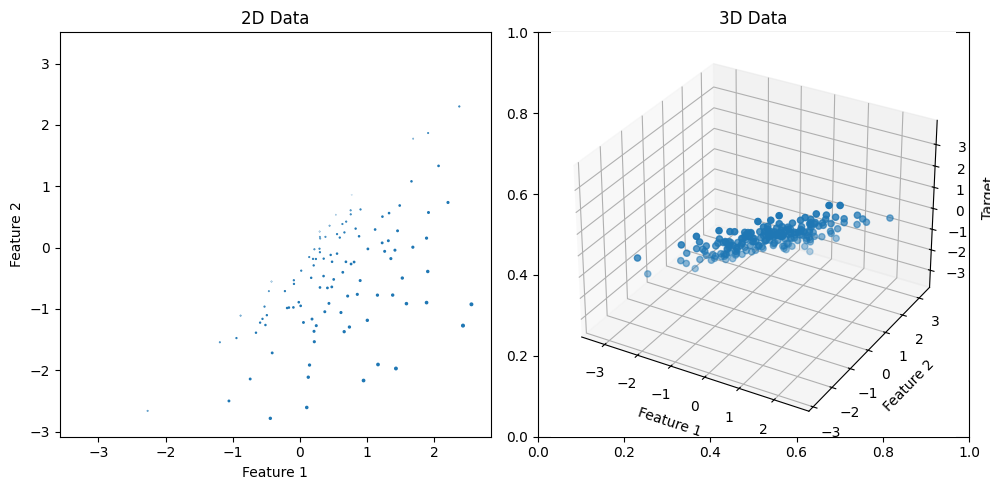

In [3]:
# Biểu diễn dữ liệu 2d và 3d
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Biểu diễn dữ liệu 2d
ax1.scatter(X[:, 0], X[:, 1], y)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('2D Data')

# Biểu diễn dữ liệu 3d
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Target')
ax2.set_title('3D Data')

plt.tight_layout()
plt.show()


#### Code model example

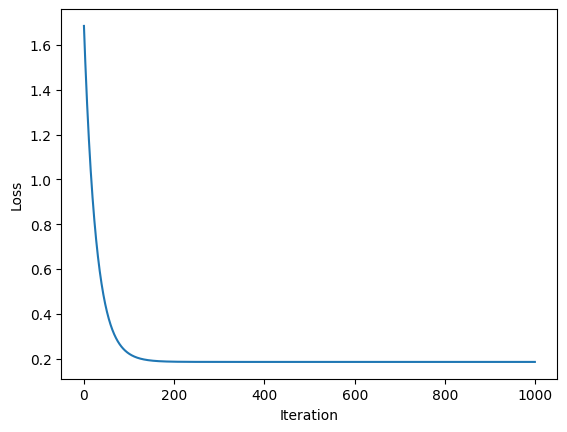

In [4]:
def lasso_regression(X, y, alpha, iterations=1000, learning_rate=0.01):
    # Khởi tạo các tham số
    m, n = X.shape
    theta = np.zeros(n)
    bias = 0

    # Lưu giá trị mất mát sau mỗi lần lặp
    losses = []

    for _ in range(iterations):
        # Tính dự đoán
        y_pred = np.dot(X, theta) + bias

        # Tính đạo hàm
        d_theta = (2/m) * np.dot(X.T, (y_pred - y)) + alpha * np.sign(theta)
        d_bias = (2/m) * np.sum(y_pred - y)

        # Cập nhật tham số
        theta -= learning_rate * d_theta
        bias -= learning_rate * d_bias

        # Tính và lưu giá trị mất mát
        loss = np.mean((y_pred - y)**2) + alpha * np.sum(np.abs(theta))
        losses.append(loss)

    return theta, bias, losses

# Chạy thuật toán Lasso Regression
theta, bias, losses = lasso_regression(X, y, alpha=0.1)

# Vẽ biểu đồ giá trị mất mát
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

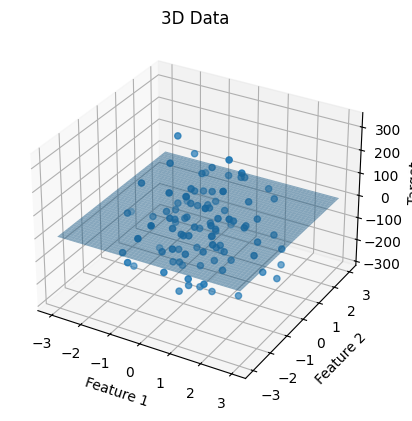

In [17]:
# biểu diễn dữ liệu đã học được
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
x0 = np.linspace(-3, 3, 100)
x1 = np.linspace(-3, 3, 100)
x0, x1 = np.meshgrid(x0, x1)
y_pred = theta[0] * x0 + theta[1] * x1 + bias
ax.plot_surface(x0, x1, y_pred, alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Data')
plt.show()

#### Đánh giá mô hình
- Bằng mô hình dựng sẵn của SKlearn

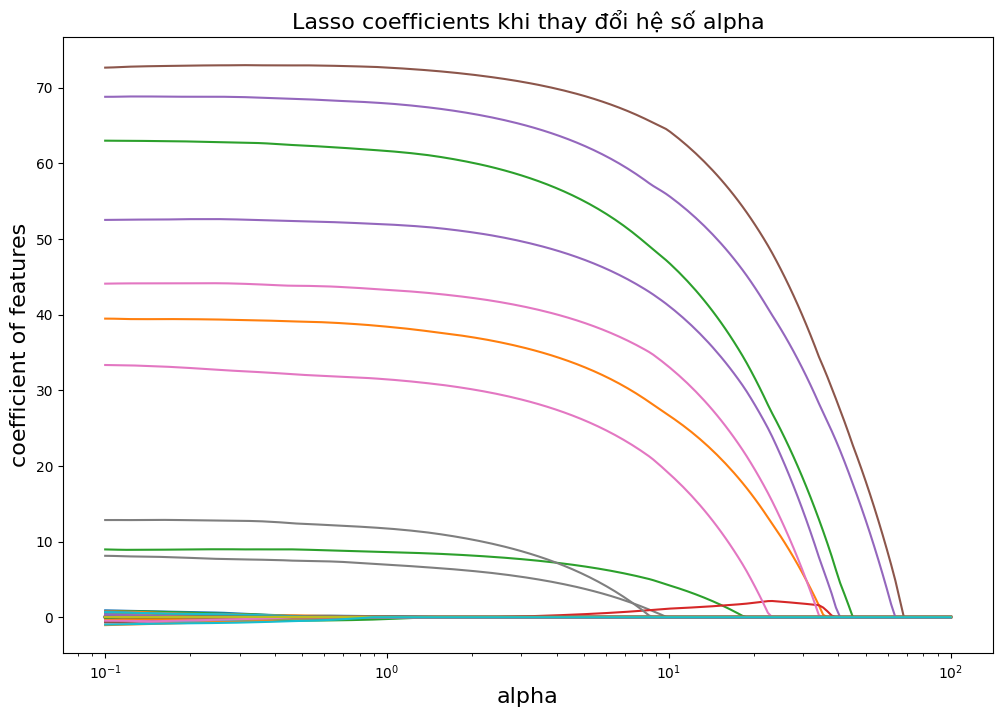

In [9]:
# Thay đổi alphas từ 1 --> 100
n_alphas = 200
alphas = 1/np.logspace(1, -2, n_alphas)
coefs = []

# Huấn luyện model khi alpha thay đổi.
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Hiển thị kết quả mô hình cho các hệ số alpha
plt.figure(figsize= (12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha', fontsize=16)
plt.ylabel('coefficient of features', fontsize=16)
plt.title('Lasso coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show()

In [12]:
reg_lasso = Lasso(alpha = 3.0)
reg_lasso.fit(X_train, y_train)

# Sai số huấn luyện trên tập train
print(reg_lasso.score(X_train, y_train))

# Hệ số hồi qui và hệ số chặn
print(reg_lasso.coef_)
print(reg_lasso.intercept_)

0.9935560947883438
[ 0.         -0.          7.68264384 -0.         -0.          0.
  0.          5.34701914  0.          0.         -0.          0.
  0.          0.          0.         -0.         -0.          0.
 -0.          0.          0.         -0.         -0.         -0.
  0.         70.7929256  -0.          0.         -0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.         -0.          0.         -0.         -0.         35.71706683
 -0.          0.10651003 49.69428981  0.         41.13193056  0.
 -0.          0.          0.         -0.          0.          0.
 -0.         -0.         28.78094644  0.          0.         -0.
  0.          0.         58.406799   -0.          0.          0.
 -0.          0.         -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
  0.          0.          0.         -0.         -0.          0.
 65.16239239 -0.          0.          0.          0.          0

In [8]:
# tuning hệ số phù hợp nhất cho mô hình hồi qui Lasso
X, y = make_regression(noise=4, random_state=0)
reg_lasso_cv = LassoCV(cv=5, random_state=0).fit(X, y)
print(reg_lasso_cv.coef_)
print(reg_lasso_cv.intercept_)

[-4.21242132e-01 -0.00000000e+00  8.74020196e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  5.04074761e-02  7.46065852e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.72366886e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -4.29663159e-01
  1.43615035e-01  0.00000000e+00 -1.79948525e-01  0.00000000e+00
 -0.00000000e+00  7.30847374e+01 -3.43884703e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.13286030e-01 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.94405369e+01 -0.00000000e+00 -0.00000000e+00
  5.23718682e+01  8.32674366e-01  4.35584487e+01 -0.00000000e+00
  0.00000000e+00  1.55124290e-01  2.58648431e-01 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  3.22013861e+01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.55887

Để ý thấy rằng trong hồi qui Lasso thì véc tơ hệ số ước lượng là một véc tơ thưa (sparse vector). Tức là trong các thành phần của nó có số lượng biến khác 0 lớn. Chính nhờ việc giữ lại những biến quan trọng và loại bỏ ảnh hưởng của những biến không quan trọng thông qua triệt tiêu hệ số ước lượng về 0 mà hồi qui Lasso còn là một kĩ thuật quan trọng để lựa chọn biến (feature selection).

### Vì sao hồi qui Lasso lại là hồi qui lựa chọn biến

Như vậy ta đã tìm hiểu sơ lược về hồi qui Lasso. Bây giờ ta sẽ tìm cách giải thích tại sao hồi qui Lasso có thể trả về kết quả là một véc tơ thưa trong khi hồi qui Ridge chỉ tìm cách giảm các hệ số của mô hình chứ không hoàn toàn tiến về 0. Một mô tả được thể hiện rõ hơn thông qua hình bên dưới
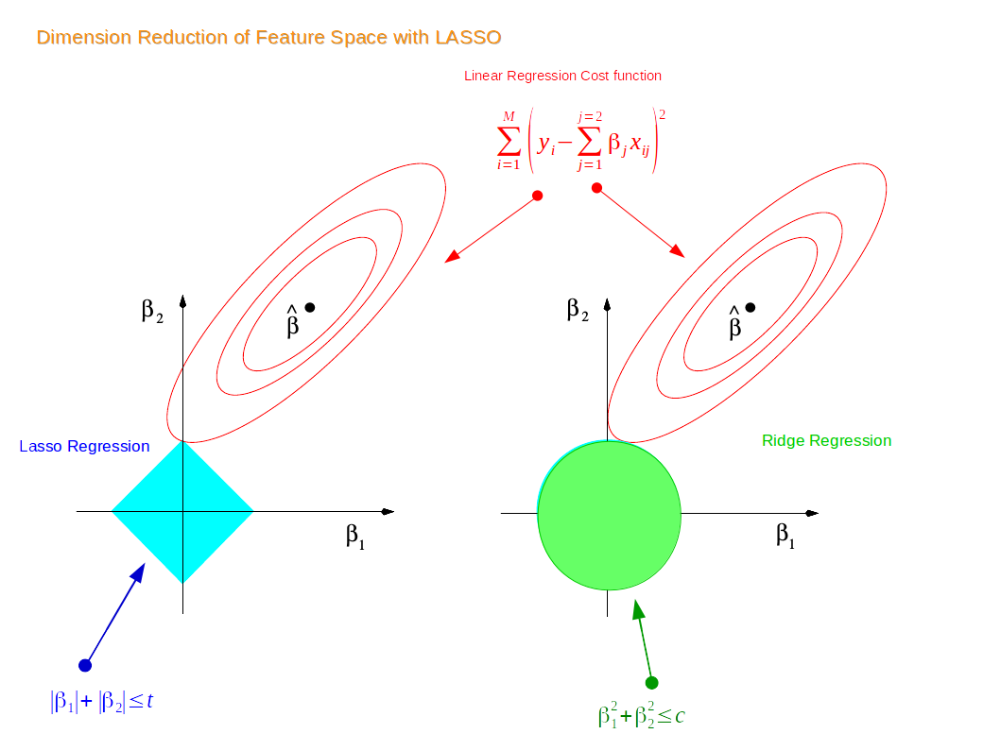

- Giả định rằng tập huấn luyện của chúng ta chỉ có hai đặc trưng. Hình bên dưới sẽ biểu diễn hàm mục tiêu và miền xác định của hai mô hình hồi qui Ridge và Lasso trong không gian hai chiều

Miền xác định của hồi qui Lasso là $|\beta_1| + |\beta_2| \leq t$
, trên đồ thị thì miền xác định này là một vùng hình thoi màu xám nằm bên trái. Hình bên phải là hồi qui Ridge có miền xác định được thể hiện bởi một hình tròn màu vàng $\beta_1^2+\beta_2^2 \leq C$. Đồ thị của hàm mục tiêu $\mathcal{L}(\mathbf{w})$ được thể hiện qua một tập hợp các đường đồng mức hình ellipse. Mỗi một đường đồng mức sẽ trả về cùng một giá trị hàm mục tiêu. Các đường đồng mức ở gần tâm $\hat{\beta}$ thì càng có giá trị nhỏ hơn. Khi mở rộng dần đường đồng mức cho tới khi tiệm cận miền xác định chúng ta sẽ thu được nghiệm của bài toán.

Đối với hồi qui Lasso thì thông thường điểm tiếp xúc giữa đường đồng mức của hàm mục tiêu và tập nghiệm thường chạm đỉnh của hình thoi. Đây là những điểm tương ứng với một chiều bằng 0. Trong khi đó, trong hồi qui Ridge thì miền xác định là một hình tròn nên tiểm tiếp xúc sẽ thường có toạ độ khác 0.

### Source code

- Link git: https://github.com/Minhdd1413/My-book.git